# Sequential Navigation wth Entorhinal-Hippocampal Circuit Model


In [1]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np

from ehc_sn import HGModelParams, HierarchicalGenerativeModel, utils

In [2]:
%matplotlib ipympl

First step is to instantiate a Hierarchical Generative Model using:

- The Dirichlet hyperparameters for the clusters mixing distribution
- Shape of the clusters (mazes) in the model
- Model parameters (e.g. mixing decay, discount factor, etc.)

Note the length of the Dirichlet hyperparameters is used to determine the number of clusters in the model.


In [3]:
model = HierarchicalGenerativeModel(
    α=[0.1] * 2,  # Initial mixing hyperparameters
    N=21**2,  # Number of data points (6,6)
    parameters=HGModelParams(δ=0.5, τ=0.5, c=0.5),
)

Next we can plot the current states for the cognitive maps stored in the model.


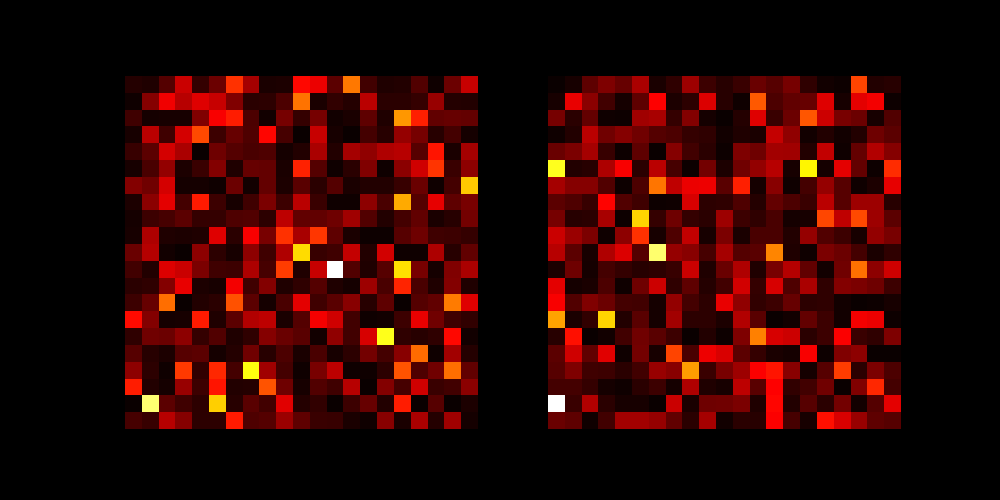

In [5]:
# Plot a cluster from the model
maps = model.get_maps()
fig, axs = plt.subplots(1, len(maps), figsize=(10, 5))
for map, ax in zip(maps, axs):
    ax.imshow(map.params.reshape(*[21] * 2), cmap="hot")
    ax.axis("off")

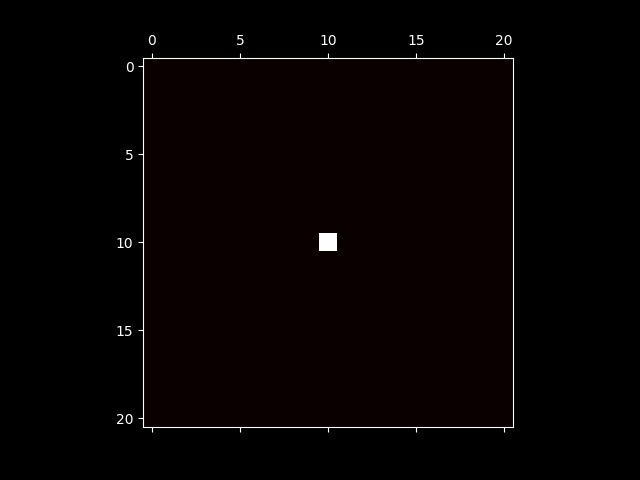

In [6]:
episode = utils.rand_episode(start=(10, 10), size=[21] * 2, T=15)
fig, ax = plt.subplots()
cax = ax.matshow(episode[0], cmap="hot")


def update(frame):
    cax.set_data(episode[frame])
    return (cax,)


ani = animation.FuncAnimation(fig, update, frames=len(episode), interval=500, blit=True)

plt.show()

In [7]:
episode = episode.reshape(15, -1)
episode.shape

(15, 441)

In [9]:
n_episodes = 10
episodes = [episode for _ in range(n_episodes)]
episodes[0].shape

(15, 441)

In [10]:
priority_maps = model.learning(episodes)
priority_maps

/home/borja/projects/ehc-sn/src/ehc_sn/__init__.py:160: RuntimeWarning: divide by zero encountered in log
  Θ[k].θ = (1 - λ) * Θ[k].θ - kronecker(ξ_i, N) @ np.log(x)  # Eq. (13)
/home/borja/projects/ehc-sn/src/ehc_sn/__init__.py:160: RuntimeWarning: invalid value encountered in matmul
  Θ[k].θ = (1 - λ) * Θ[k].θ - kronecker(ξ_i, N) @ np.log(x)  # Eq. (13)


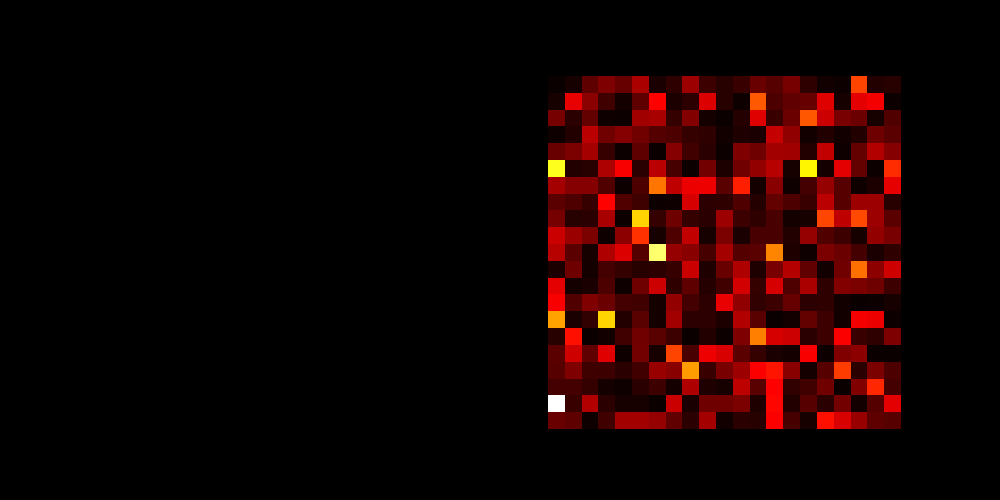

In [12]:
# Plot priority maps
fig, axs = plt.subplots(1, len(maps), figsize=(10, 5))
for map, ax in zip(priority_maps, axs):
    ax.imshow(map.params.reshape(*[21] * 2), cmap="hot")
    ax.axis("off")

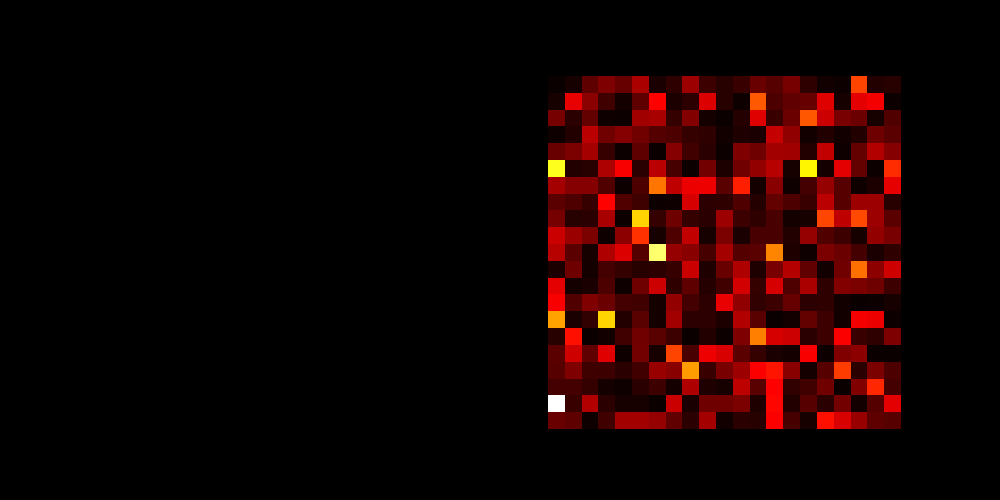

In [14]:
# Plot a cluster from the model
maps = model.get_maps()
fig, axs = plt.subplots(1, len(maps), figsize=(10, 5))
for map, ax in zip(maps, axs):
    ax.imshow(map.params.reshape(*[21] * 2), cmap="hot")
    ax.axis("off")